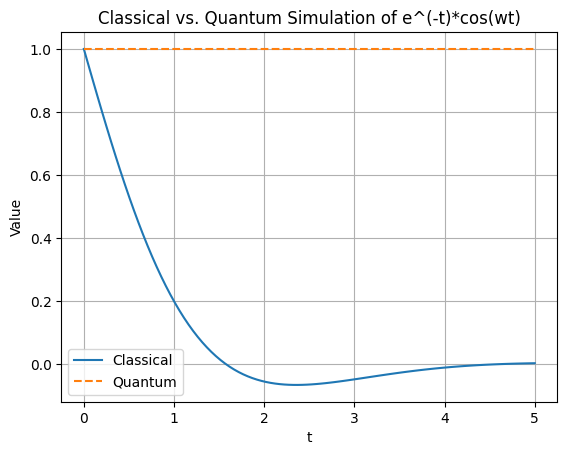

In [7]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Define the quantum device and the number of qubits
num_qubits = 4  # Adjust based on precision requirements
dev = qml.device("default.qubit", wires=num_qubits)

# Define the time and frequency values
t_values = np.linspace(0, 5, 100)  # Values of t from 0 to 5
w = 1.0  # Replace with your desired value of w

# Define the controlled unitary operators for e^(-iwt) and e^(-it)
U_w = expm(-1j * w * np.array([[0, 1], [1, 0]]))
U_t = expm(-1j * np.array([[0, 1], [1, 0]]))

# Classical function for e^(-t)cos(wt)
def classical_function(t, w):
    return np.exp(-t) * np.cos(w * t)

# Define the Quantum Phase Estimation (QPE) circuit
@qml.qnode(dev)
def qpe_circuit(params, t, w):
    # Prepare the initial state in superposition
    for qubit in range(num_qubits - 1):
        qml.Hadamard(wires=qubit)
    
    # Apply controlled-U_w gates
    for qubit in range(num_qubits - 1):
        qml.QubitUnitary(U_w, wires=[qubit])
    
    # Apply the inverse QFT
    qml.QFT(wires=list(range(num_qubits - 1)))
    # qml.adjoint(qml.QFT)(wires = range(num_qubits - 1))

    # Measure
    return [qml.expval(qml.PauliZ(qubit)) for qubit in range(num_qubits - 1)]

# Calculate classical and quantum results for each t
classical_results = [classical_function(t, w) for t in t_values]
quantum_results = [qpe_circuit([0], t, w)[-1] for t in t_values]

# Plot both classical and quantum results
plt.plot(t_values, classical_results, label="Classical")
plt.plot(t_values, quantum_results, label="Quantum", linestyle="--")
plt.xlabel("t")
plt.ylabel("Value")
plt.title("Classical vs. Quantum Simulation of e^(-t)*cos(wt)")
plt.legend()
plt.grid()
plt.show()
